### 과제1. Decision Tree
유방암 결과를 분류하는 의사결정나무 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라.   
그리고 모델의 정확도와 confusion matrix를 구하라.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# 데이터 분할, 의사결정나무, 랜덤포레스트 모델
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# 분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

# 랜덤포레스트 분류모델
from sklearn.ensemble import RandomForestClassifier
matplotlib.rc('font', family = 'Malgun Gothic')

먼저 데이터를 호출한 후, 데이터의 유형과 결측치를 확인한다.
확인 결과, 목표변수인 diagnosis를 제외한 나머지 컬럼은 모두 실수형 변수이다.  
결측치는 존재하지 않는다.

In [5]:
df = pd.read_csv('유방암.csv', encoding='euc-kr')
display(df.head(), df.info(), df.isnull().sum(axis=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


None

0      0
1      0
2      0
3      0
4      0
      ..
315    0
316    0
317    0
318    0
319    0
Length: 320, dtype: int64

목표변수와 설명변수를 구분하고, 모델 생성을 위한 train 데이터와 test 데이터를 분할하였다.  
이후, 의사결정나무 모델을 생성하고 하이퍼 파라미터 조정을 하지 않은 상태에서 모델 성능을 확인하였다.  
모델 정확도는 train 100%, test 88.3%로 train 데이터에 과적합 되었음을 알 수 있다.

In [7]:
df_y = df['diagnosis']
df_x = df.drop('diagnosis', axis=1)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.4, random_state = 1234)

tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.883


train data에 대한 과대적합을 해소하기 위해 모델 Parameter를 하나씩 조정  
먼저 범위 30까지의 최대 깊이에서 모델 정확도를 살펴보고 최적의 깊이를 결정한다.  
최대 깊이가 5일 때까지 증가하다가 이후 x축과 평행한 선을 그리고 있다.  
따라서, 최대 깊이를 5로 설정하였다.

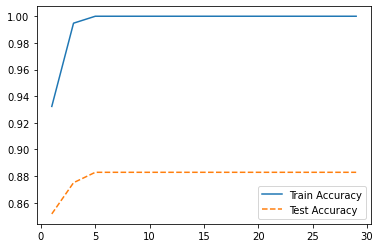

In [8]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,30,2)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

df_accuracy_depth.round(3)
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

분리 노드 최소 자료 수의 경우 70 이후부터 자료 수 증가에 따라 모델 정확도가 감소한다.  
따라서, 모델의 성능 확보를 위해 분리 노드 최소 자료의 수는 60 으로 설정한다.

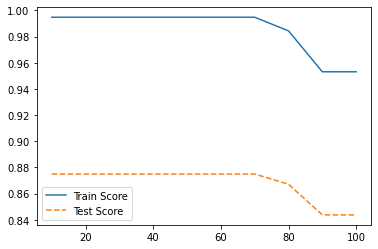

In [15]:
train_score = []; test_score = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234, min_samples_split=v_min_samples_split, max_depth = 5)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

df_score_split.round(3)
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()

다음으로 잎사귀 노드의 최소 자료 수에 따른 모델 성능을 확인하였다.  
앞선 파라미터와 달리, train 정확도가 감소할 때 test 정확도가 상승하는 구간이 형성되면서,  
과적합에 대한 우려가 다소 사라졌다.  
train과 test의 정확도 gap이 최소화되는 10(약 9.5~10)을 잎사귀 노드의 최소 자료 수로 설정하였다.

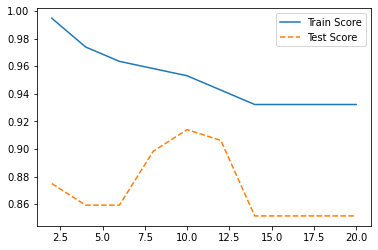

In [20]:
train_score = []; test_score = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=v_min_samples_leaf, max_depth = 5, min_samples_split=60)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()

설정한 하이퍼 파라미터 값을 바탕으로 최종 트리 모델을 구현 및 시각화하였다.  
min_samples_split 값을 크게 준 탓인지 max_depth를 5로 설정하였지만 모델에서는 depth가 3이다.  

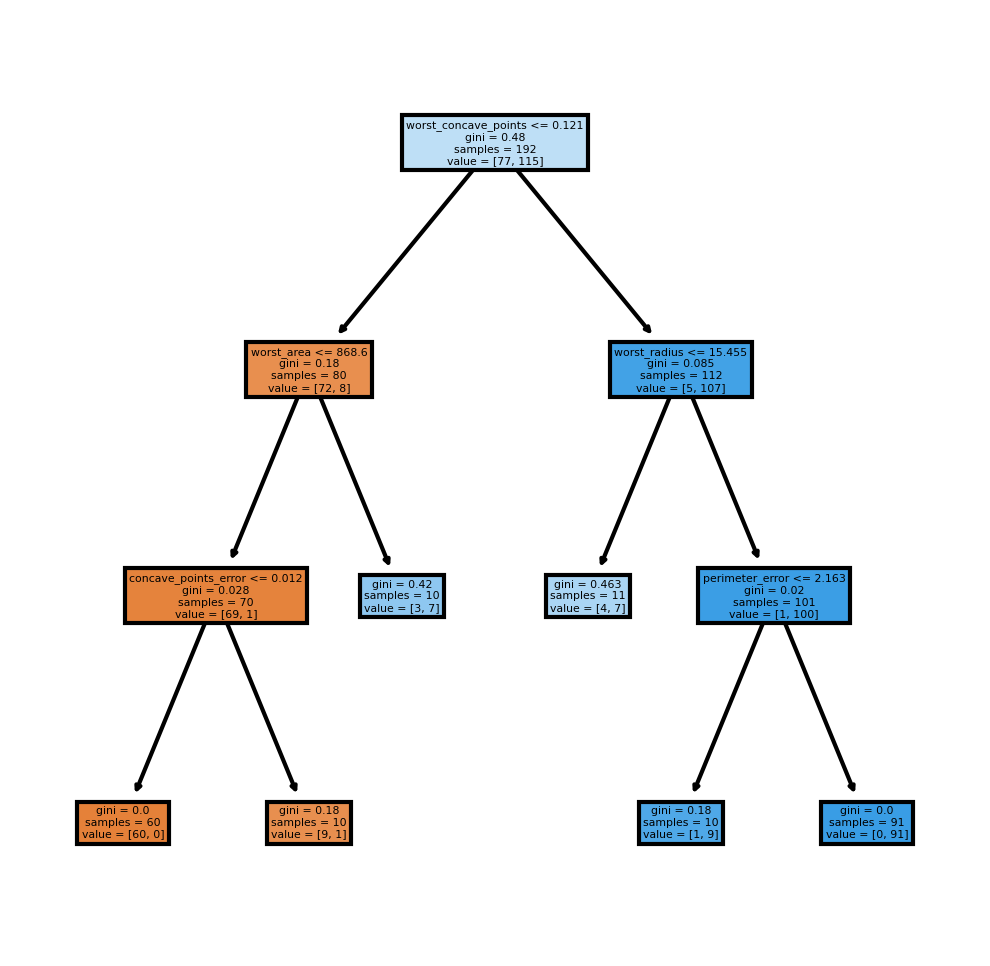

In [27]:
tree_final = DecisionTreeClassifier(random_state=1234,  min_samples_leaf=10, min_samples_split=60, max_depth = 5)
tree_final.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

최종 모델의 성능 평가 지표이다.  
모델의 정확도는 91.4%, confusion matrix는 다음과 같이 나타났다.  
아쉬운 점은, 유방암 분류 모델의 경우 양성에 대한 분류 성능이 더 좋아야 하는데  
해당 모델의 경우 음성에 대한 성능이 더 좋게 나왔다.

In [31]:
y_pred = tree_final.predict(df_test_x)
print('Accuracy : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : {}'.format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy : 0.914
Confusion matrix : [[23  8]
 [ 3 94]]
              precision    recall  f1-score   support

          양성      0.885     0.742     0.807        31
          음성      0.922     0.969     0.945        97

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



트리 모델에서 유방암 영향이 큰 변수는 worst_concave_points, worst_area, worst_radius 순으로 나타났다.  
앞서 트리 모델 plot에서 보았듯이 worst_concave_points가 0.121 이하 여부를 기준으로 1차 분류를 진행하고,  
분류된 각 노드에서 worst_area, worst_radius로 분류를 하는 것을 알 수 있다.

Text(0, 0.5, '변수')

C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarni

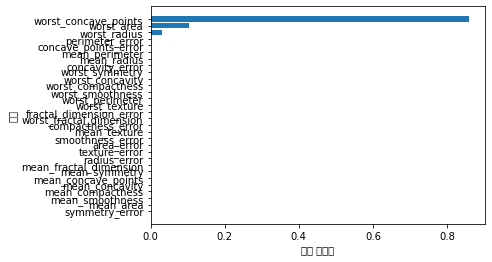

In [32]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

### 과제2. RandomForest

앞선 유방암 데이터를 랜덤포레스트를 통해 리모델링 하고자 한다.  
다수의 결정 트리 결합에 의해 더 좋은 분류 성능을 보여줄 것이라 기대된다.  
의사결정나무와 마찬가지로 파라미터 조정 없이 먼저 모델을 생성해 보았다.  
train 100%, test 91.4%로 똑같이 train data에 과대적합이 발생함을 알 수 있다.

In [45]:
tree_uncustomized = RandomForestClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.914


랜덤포레스트 모델의 하이퍼 파라미터 조정을 통해 test에 대한 모델 성능을 높이고자 한다.  
먼저 n_estimators 수를 설정한다. 

n_estimators가 20일 때 train과 test 데이터 성능이 동시에 증가함을 알 수 있다.

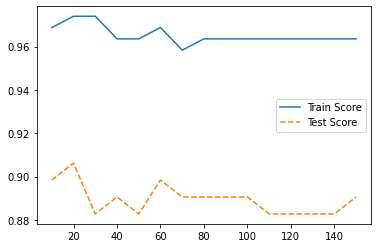

In [46]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree = RandomForestClassifier(random_state = 1234, n_estimators=v_n_estimators, max_depth = 5, min_samples_split=60)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n['MinSamplesLeaf'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

df_score_n.round(3)
plt.plot(para_n_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.legend()

다음은 트리 수 변경에 따른, oob error이다. 그래프를 보면,  
트리 수가 증가할수록 oob_error가 감소함을 알 수 있다.  
하지만, 20 이후부터는 큰 성능변화가 없으므로 앞선 결과와 종합하여 트리 수를 20으로 설정한다.

C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably 

Text(0.5, 0, 'n_estimators')

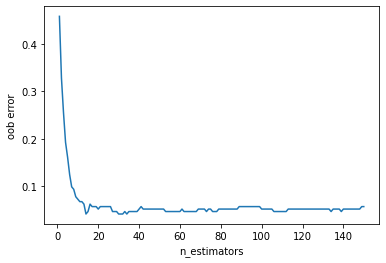

In [48]:
oob_error = []

for v_n_estimators in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimators, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)
    
plt.plot(range(1,151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

max_depth, min_samples_split, min_samples_leaf 파라미터는  
앞선 의사결정나무와 동일한 과정을 통해 값을 설정한다.

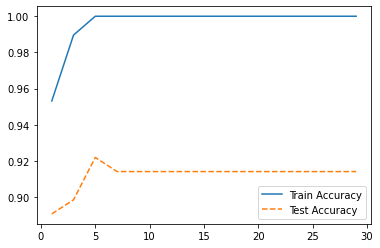

In [75]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,30,2)]

for v_max_depth in para_depth:
    tree = RandomForestClassifier(max_depth = v_max_depth, random_state = 1234, n_estimators = 20)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

df_accuracy_depth.round(3)
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

# 5로 설정

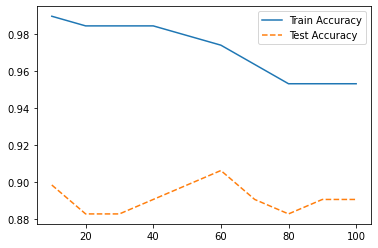

In [53]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = RandomForestClassifier(max_depth = 5, random_state = 1234, n_estimators = 20, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Depth'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

df_accuracy_split.round(3)
plt.plot(para_split, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.legend()

# 60으로 설정

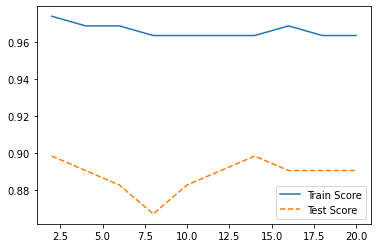

In [77]:
train_score = []; test_score = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = RandomForestClassifier(random_state = 1234, min_samples_split = 60, n_estimators = 20, max_depth = 5, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()

# 14로 설정

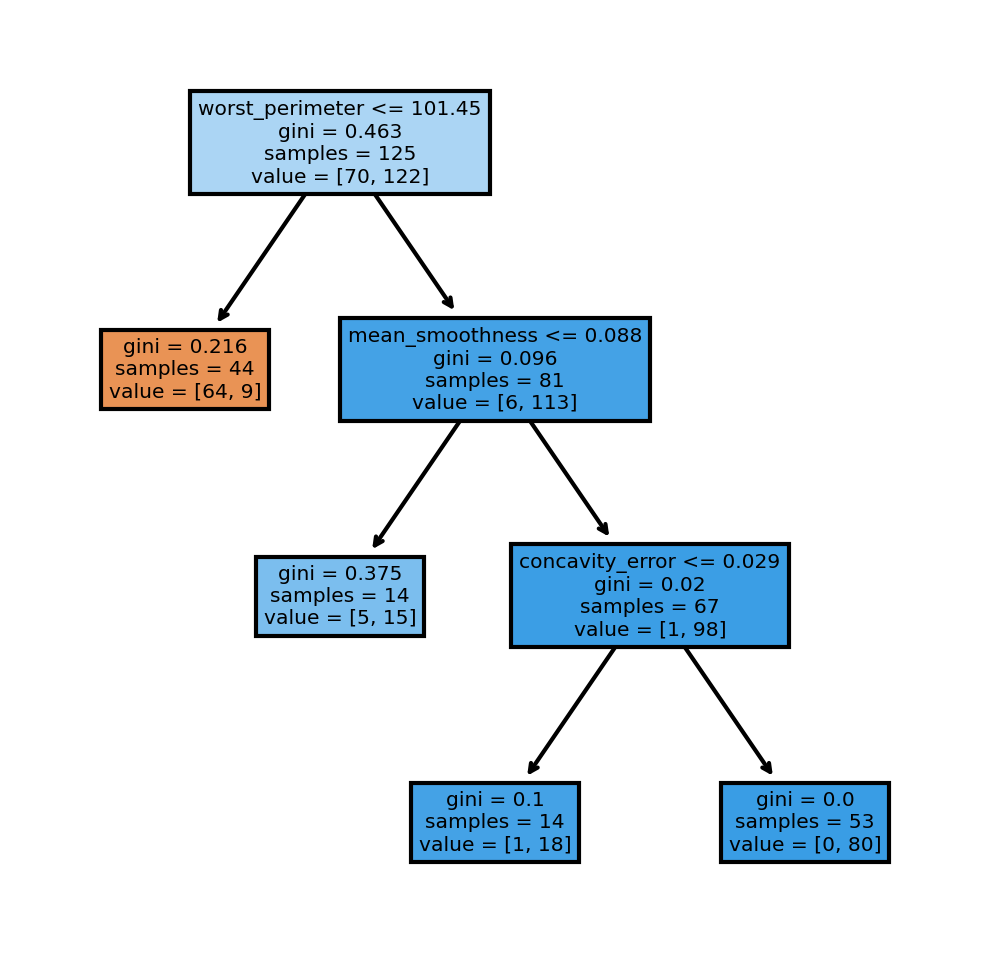

In [72]:
rf_final = RandomForestClassifier(random_state = 1234, min_samples_split = 60, n_estimators = 20, max_depth = 5, min_samples_leaf=14)
rf_final.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(rf_final[1], feature_names = v_feature_name, filled = True);

랜덤포레스트 모델 구현 결과, 정확도는 89.8%, confusion matrix는 다음과 같이 나왔다.  
의사결정나무보다 정확도와 f-1 score 또한 낮은 것을 알 수 있다.  
GridSearchCV를 활용해 최적의 parameter를 찾고 싶지만,  
노트북 성능의 한계상 다음에 도전하고자 한다.  

In [73]:
y_pred = rf_final.predict(df_test_x)
print('Accuracy : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : {}'.format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy : 0.898
Confusion matrix : [[25  6]
 [ 7 90]]
              precision    recall  f1-score   support

          양성      0.781     0.806     0.794        31
          음성      0.938     0.928     0.933        97

    accuracy                          0.898       128
   macro avg      0.859     0.867     0.863       128
weighted avg      0.900     0.898     0.899       128



변수 중요도는 의사결정나무 모델과 마찬가지로,  
worst_concave_points, worst_area, worst_radius 순으로 중요도가 높은 것으로 나타났다.

Text(0.5, 0, '변수 중요도')

C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goeunseong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarni

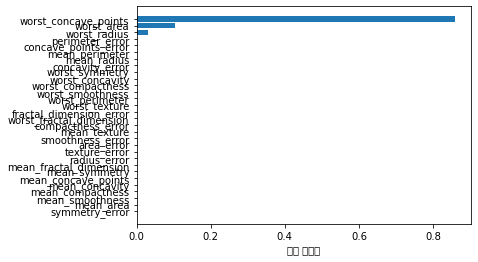

In [74]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')